In [1]:
import pandas
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
%matplotlib inline

1) Загрузите выборку из файла gbm-data.csv с помощью pandas и преобразуйте ее в массив numpy (параметр values у датафрейма). В первой колонке файла с данными записано, была или нет реакция. Все остальные колонки (d1 - d1776) содержат различные характеристики молекулы, такие как размер, форма и т.д. Разбейте выборку на обучающую и тестовую, используя функцию train_test_split с параметрами test_size = 0.8 и random_state = 241.

In [2]:
data = pandas.read_csv('data/gbm-data.csv')
X = data.loc[:, 'D1':'D1776']
y = data['Activity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

2) Обучите GradientBoostingClassifier с параметрами n_estimators=250, verbose=True, random_state=241 и для каждого значения learning_rate из списка [1, 0.5, 0.3, 0.2, 0.1] проделайте следующее:
- Используйте метод staged_decision_function для предсказания качества на обучающей и тестовой выборке на каждой итерации.
- Преобразуйте полученное предсказание с помощью сигмоидной функции по формуле 1 / (1 + e^{−y_pred}), где y_pred — предсказанное значение.
- Вычислите и постройте график значений log-loss (которую можно посчитать с помощью функции sklearn.metrics.log_loss) на обучающей и тестовой выборках, а также найдите минимальное значение метрики и номер итерации, на которой оно достигается.

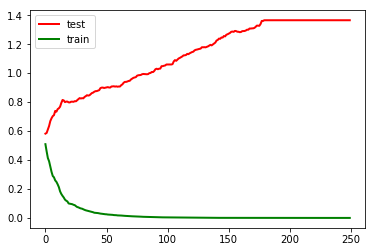

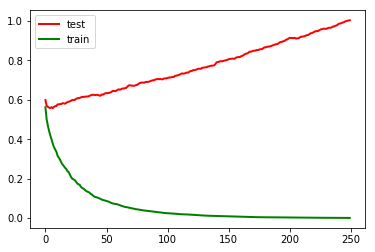

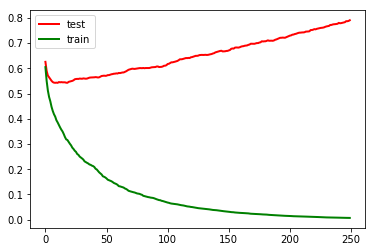

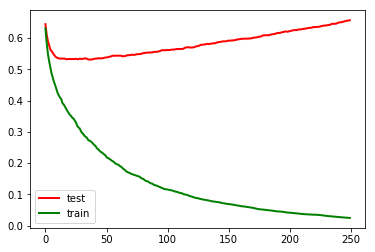

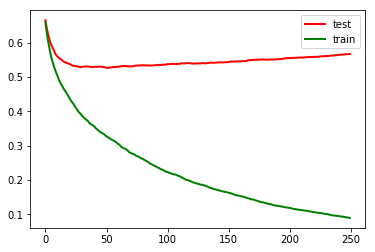

In [3]:
learning_rate = [1, 0.5, 0.3, 0.2, 0.1]
for i in learning_rate:
    model = GradientBoostingClassifier(learning_rate = i, n_estimators=250, verbose=False, random_state=241)
    model.fit(X_train, y_train)
    scores_train = []
    for x in model.staged_decision_function(X_train):
        scores_train.append(log_loss(y_train, [1.0 / (1.0 + math.exp(-i)) for i in x]))
    scores_test = []
    for x in model.staged_decision_function(X_test):
        scores_test.append(log_loss(y_test, [1.0 / (1.0 + math.exp(-i)) for i in x]))
        
    plt.figure()
    plt.plot(scores_test, 'r', linewidth=2)
    plt.plot(scores_train, 'g', linewidth=2)
    plt.legend(['test', 'train'])    

3) Как можно охарактеризовать график качества на тестовой выборке, начиная с некоторой итерации: переобучение (overfitting) или недообучение (underfitting)? В ответе укажите одно из слов overfitting либо underfitting. - 'overfitting'  
4) Приведите минимальное значение log-loss на тестовой выборке и номер итерации, на котором оно достигается, при learning_rate = 0.2.

5) На этих же данных обучите RandomForestClassifier с количеством деревьев, равным количеству итераций, на котором достигается наилучшее качество у градиентного бустинга из предыдущего пункта, c random_state=241 и остальными параметрами по умолчанию. Какое значение log-loss на тесте получается у этого случайного леса? (Не забывайте, что предсказания нужно получать с помощью функции predict_proba. В данном случае брать сигмоиду от оценки вероятности класса не нужно)